In [22]:
import numpy as np
import plotting

(10, 3000)
(10, 3000)
(10, 100)


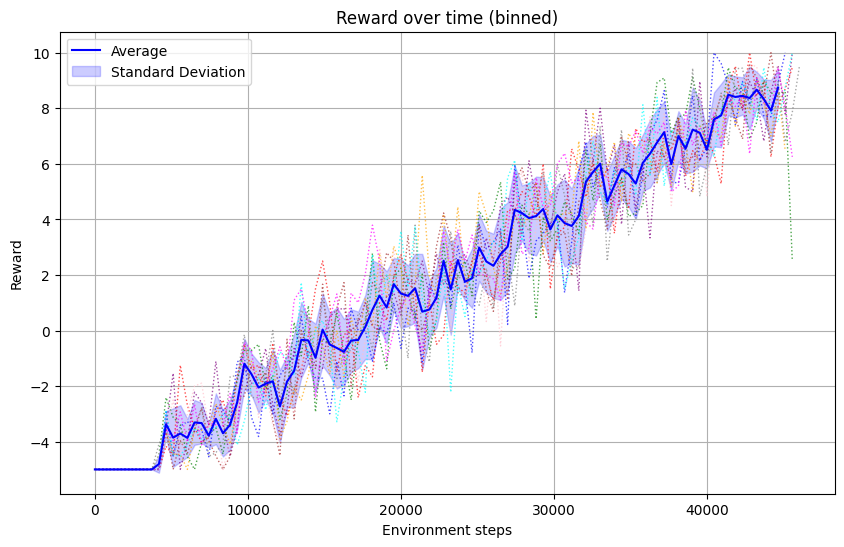

In [23]:
size = 3000
amount_of_seeds = 10

xss = []
yss = []

for s in range(amount_of_seeds):
    rewards = []
    for i in range(10):
        rewards += list(np.random.choice([10, -5], size // 10, p=[i*0.1, 1 - i*0.1]))
    yss.append(rewards)

    xs = []
    x = 0
    for i in range(size):
        x += np.random.randint(1, 30)
        xs.append(x)
    xss.append(xs)

xss = np.array(xss)
yss = np.array(yss)

print(xss.shape)
print(yss.shape)

# Set plot_individuals to False when you dont want the individuals (dotted lines)
plotting.plot_binned_line_with_std(xss, yss, 100, y_label="Reward or Episode Length", title="Reward/Episode Length over time", plot_individuals=True)

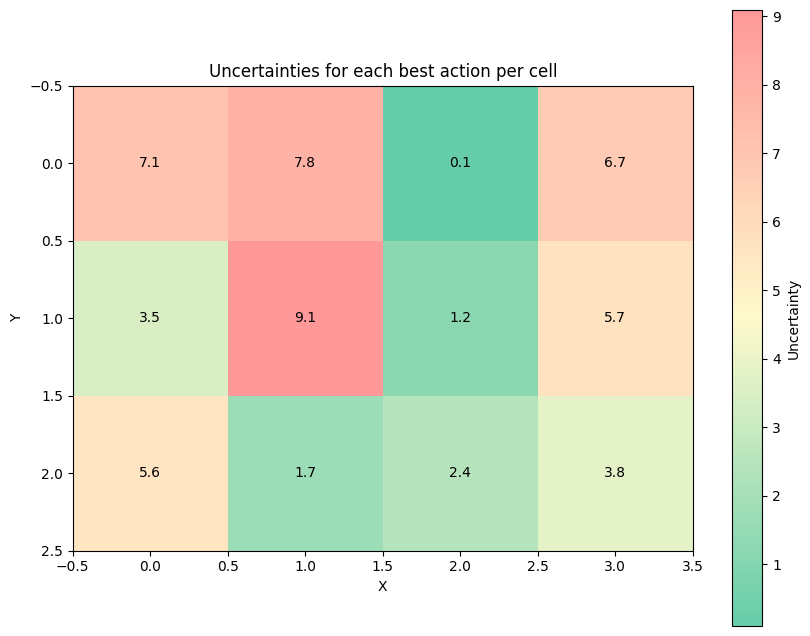

In [24]:
height = 3
width = 4

# Uncertainties is just a random value between 0 and 10 for now
uncertainties = np.random.uniform(0, 10, (height, width, 5))

best_actions = np.random.randint(0, 5, (height, width))

plotting.plot_grid_heatmap(uncertainties, best_actions, colour_scheme="light ryg")